# Линейная алгебра. Лабораторная работа 1, осень 2019

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [69]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [63]:
Z = np.array([[0 for j in range(4)]for i in range(3)])
print(Z)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [7]:
B = np.array([[0 if(i!=j) else i+1 for j in range(5)]for i in range(5)])
print(B)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [9]:
print(B.trace())

15


In [10]:
C = sla.inv(B)
print(C)

[[ 1.          0.          0.          0.         -0.        ]
 [ 0.          0.5         0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [13]:
X = np.random.rand(4,5)
print(X)

[[0.46509657 0.9671789  0.62696748 0.30104468 0.29941681]
 [0.90132687 0.79158238 0.57450537 0.05132068 0.13646801]
 [0.52881365 0.42580234 0.58050891 0.88724544 0.95212894]
 [0.28600935 0.85231333 0.99438715 0.86235622 0.22247672]]


In [21]:
print(sla.det(X[1:3,0:2]))

-0.03481247539890774


In [14]:
Q = X.T.dot(X)
print(Q)

[[1.39015017 1.63224573 1.40080261 0.90210101 0.82938922]
 [1.63224573 2.46978335 2.15586952 1.44457751 0.9926539 ]
 [1.40080261 2.15586952 2.04894103 1.59079905 1.04007353]
 [0.90210101 1.44457751 1.59079905 1.62412443 1.13376772]
 [0.82938922 0.9926539  1.04007353 1.13376772 1.06431936]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а, кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [31]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    EPS = 10E-9
    a = X.copy()
    n = a.shape[0]
    m = a.shape[1]
    if n!=m:
        raise Exception('ValueError')
    a = a.astype('float64')
    det = 1
    for i in range(0,n):
        k = i;
        for j in range(i+1,n):
            if (abs(a[j][i]) > abs(a[k][i])):
                k = j
        v = a[i].copy()
        a[i] = a[k].copy()
        a[k] = v.copy()
        if (i != k):
            det = -det
        det *= (a[i][i]*10e10)
        det/=10e10
        for j in range(i+1,n):
            a[i][j] = (a[i][j]*10e10) / (a[i][i]*10e10) ;
        for j in range(0,n):
            if (j != i):
                for k in range(i+1,n):
                    if(n>=50):
                        a[j][k] -= ((a[i][k]*10e10) * (a[j][i]*10e10)) #улутшение точности на больших матрицах
                    else:
                        a[j][k] -= a[i][k] * a[j][i]
    return det

X = np.array([[0, 1], [1, 0]])
my_det(X)

-1.0

На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [39]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')
        print(my_det(X))
        print(sla.det(X))
    else:
        print("Passed")

Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed
Passed


Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

10.7 µs ± 695 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars


504 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
66.9 µs ± 328 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\SS\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars


460 ms ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
14.1 ms ± 376 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7min 17s ± 2.66 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


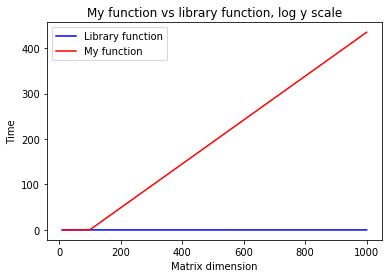

In [7]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

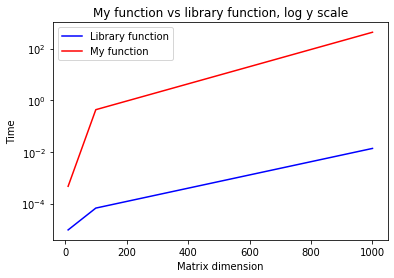

In [8]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [48]:
# Your code here
A = np.array([[1 ,0] ,[10**20 ,1]])
B = np.array([[10**-20 ,1] ,[0 ,1-10**20]])
A1 = np.array([[1. ,0.] ,[10.e20 ,1.]])
B1 = np.array([[10.e-20 ,1.] ,[0.0 ,1.-10.e20]])

print(A.dot(B))
print(A1.dot(B1))

[[1e-20 1]
 [1.0 1]]
[[1.e-19 1.e+00]
 [1.e+02 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**

In [ ]:
#Первый ответ является верным

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [487]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0][i] = 1.
    for i in range(1,dim):
        P[i][0] = 1.
    for i in range(1,dim):
        for j in range (1,dim):
            P[i][j] = P[i-1][j]+P[i][j-1]
    
    
    # Your code here
    
    return P

print(my_pascal(5))

[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  3.  6. 10. 15.]
 [ 1.  4. 10. 20. 35.]
 [ 1.  5. 15. 35. 70.]]


Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

In [ ]:
#Определитель матрицы Паскаля = 1. Вычтем из последних n-1 строк предыдущую(по порядку снизу), вычтем из последних n-2 строк
#предыдущую,......,вычтем из последней строки предыдущую. Получим верхнетреугольную матрицу с диагональю единиц, выполнив только
#элементарные преобразования первого типа, следовательно, определитель матрицы паскаля равен единице.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [490]:
X = my_pascal(30)
print(sla.det(X))

1.0299188904699096e+48


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [76]:
def prod_and_sq_sum(A):
    diag = A.diagonal()
    pro = diag.prod()
    diag = diag**2
    sum = diag.sum()
    return pro, sum
    
t = np.array([[13,2,13],[456,53,632],[117,118,911]])
prod_and_sq_sum(t)

(627679, 832899)

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [79]:
def f(A, B, k):
    n = A.shape[0]
    q = min(n,k) # до n
    A = A[:,:q]
    B = B[:,:q]
    B = B.T
    Ans = A.dot(B)
    return Ans


t = np.array([[1,2,3],[4,5,6],[7,8,9]])
f(t,t,3)

array([[ 14,  32,  50],
       [ 32,  77, 122],
       [ 50, 122, 194]])

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [82]:
def get_diag(A,B):
    B = B.T
    Q = (A*B).sum(axis=1)
    return Q

t = np.array([[1,2,3],[4,5,6],[7,8,9]])
get_diag(t,t)

array([ 30,  81, 150])

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ отражает вектор относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$ ([определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F%29)).

In [107]:
def shrink_rotate(x, a, coef=1., angle=0.):
    # Your code here
    len  = (x-a)*coef
    angles = np.arctan2(len.imag, len.real)
    angles+=angle
    vec = (abs(angles)%np.pi * angles/abs(angles))
    len = abs(len)*(np.cos(vec) + np.sin(vec) * 1j) + a
    return len
    # raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    len  = (x-a)*coef
    angles = np.arctan2(len.imag, len.real)
    angles+=angle
    vec = -(abs(angles)%np.pi * angles/abs(angles))
    len = abs(len)*(np.cos(vec) + np.sin(vec) * 1j) + a
    return len
    # raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    x0 = x.real - a.real
    y0 = x.imag - a.imag
    x = a.real + ((r**2)*x0)/(x0**2 + y0**2) + 1j*(a.imag + ((r**2)*y0)/(x0**2 + y0**2))
    return x
    
    
    #raise NotImplementedError()

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

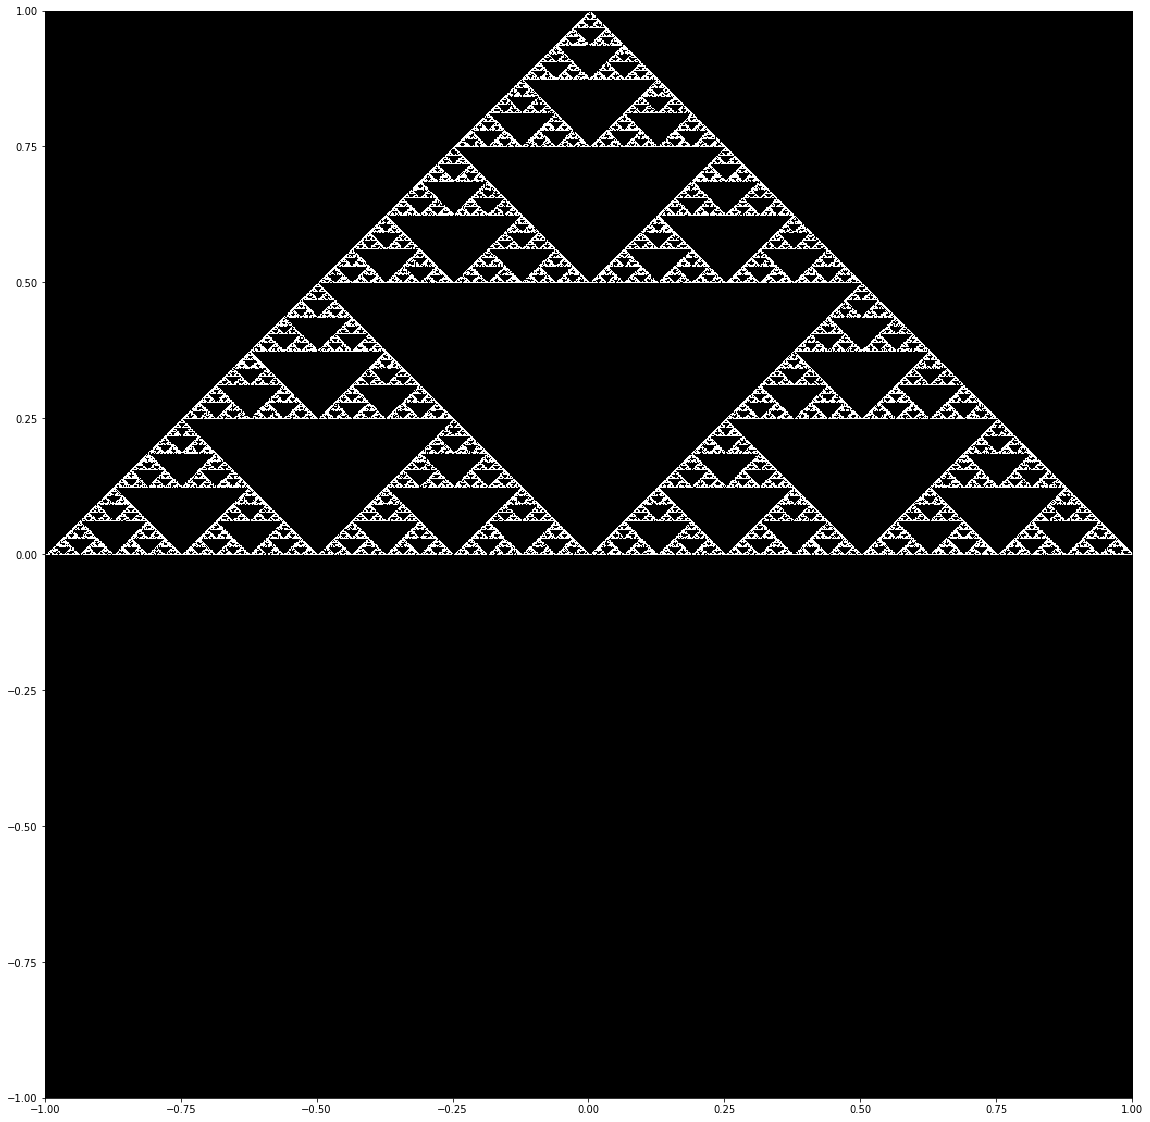

In [484]:
A = np.zeros((1000,1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    real= int((z.real + 1.) * 500)
    imaginary = int((z.imag + 1.) * 500)
    if n_iter > 10:
        A[-imaginary][-real] = 1
plt.figure(figsize=(20, 20))
plt.imshow(A, cmap='gray', extent=[-1, 1, -1, 1])

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

В силу того, что данная программа по факту выполняет алгоритм, предложенных создателем треугольника Серпинкого, получается сам треугольник Серпинсокого.

**Задание 5.5** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

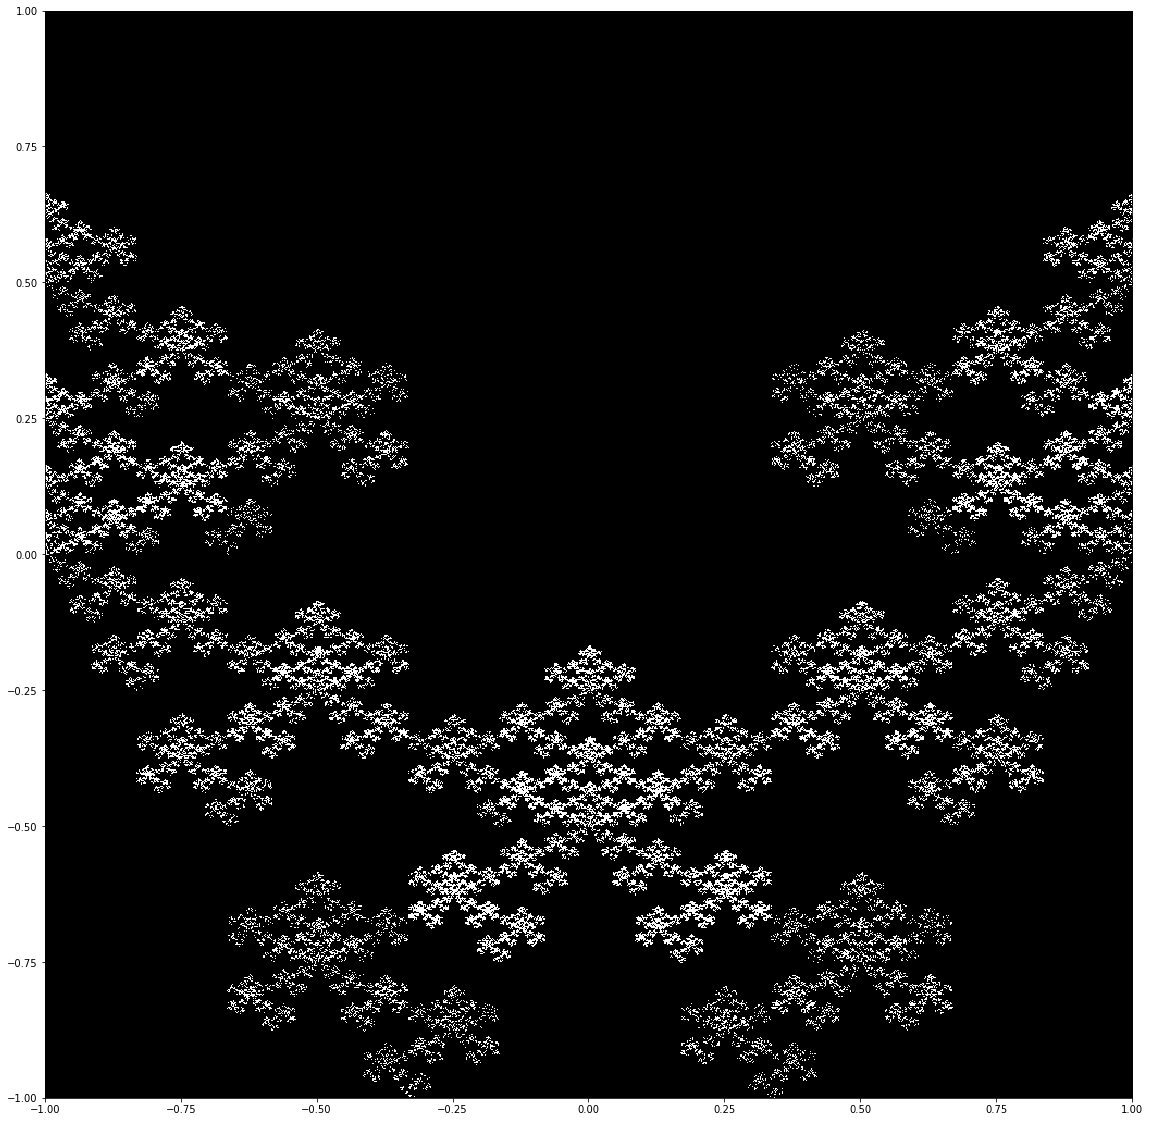

In [485]:
import random

A = np.zeros((1000,1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=-0.0)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.0)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + 0.5*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -0. + 0.5*1j, coef=0.5, angle=0.))
]
prev = 0
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    while(n_func == prev):
        n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    real= int((z.real + 1.) * 1000)
    imaginary = int((z.imag + 1.) * 1000)
    prev = n_func
    if n_iter > 10:
        A[-imaginary%1000][-real%1000] = 1
plt.figure(figsize=(20, 20))
plt.imshow(A, cmap='gray', extent=[-1, 1, -1, 1])

## Бонус. Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

54.7 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
40.8 µs ± 472 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
119 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
164 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
190 µs ± 9.34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
346 µs ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
540 µs ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
959 µs ± 65.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.99 ms ± 466 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.87 ms ± 39.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
28.7 ms ± 844 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
51 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


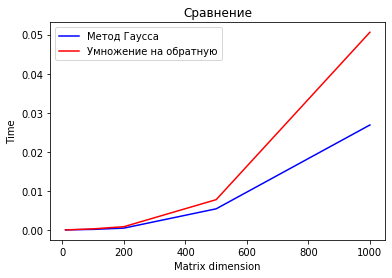

In [474]:
n = [10, 50, 100, 200, 500, 1000]
m = 10

lib_times = []
my_times = []
for i in range(6):
    A = np.random.rand(n[i], n[i])
    B = np.random.rand(n[i],m)
    res_lib = %timeit -o sla.solve(A,B)
    lib_times.append(res_lib.best)
    res_my = %timeit -o sla.inv(A).dot(B)
    my_times.append(res_my.best)    

plt.plot(n, lib_times, color='blue', label='Метод Гаусса')
plt.plot(n, my_times, color='red', label='Умножение на обратную')
plt.title('Сравнение')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()






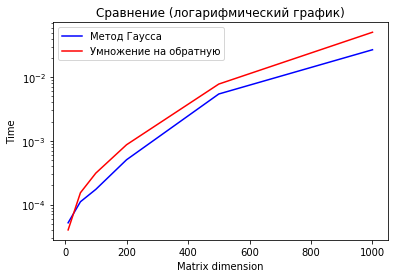

In [475]:
plt.semilogy(n, lib_times, color='blue', label='Метод Гаусса')
plt.semilogy(n, my_times, color='red', label='Умножение на обратную')
plt.title('Сравнение (логарифмический график)')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

242 µs ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
345 µs ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
256 µs ± 6.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
371 µs ± 6.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
494 µs ± 9.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
540 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
867 µs ± 116 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
911 µs ± 55.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.49 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.49 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.67 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.96 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11 ms ± 810 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.86 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


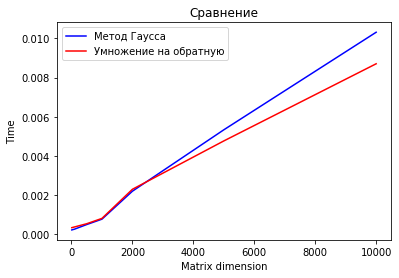

In [476]:
m = [10, 100, 500, 1000, 2000, 5000, 10000]
n = 100

lib_times = []
my_times = []
for i in range(7):
    A = np.random.rand(n, n)
    B = np.random.rand(n,m[i])
    res_lib = %timeit -o sla.solve(A,B)
    lib_times.append(res_lib.best)
    res_my = %timeit -o sla.inv(A).dot(B)
    my_times.append(res_my.best)    

plt.plot(m, lib_times, color='blue', label='Метод Гаусса')
plt.plot(m, my_times, color='red', label='Умножение на обратную')
plt.title('Сравнение')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()



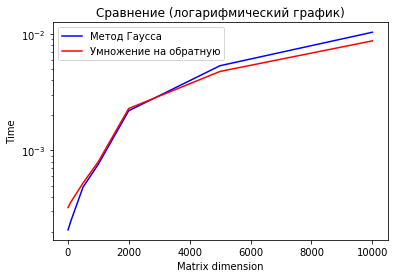

In [477]:
plt.semilogy(m, lib_times, color='blue', label='Метод Гаусса')
plt.semilogy(m, my_times, color='red', label='Умножение на обратную')
plt.title('Сравнение (логарифмический график)')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Метод обратной матрицы: Cуммарно(операций сложения, умножения, деления и сравнение) необходимо сделать SUM(k = [1,n]) (n-k)+3(2n-k)^2 + 3(2n-k) = 1/2n(14n^2 + n  - 3) операций на приведение A к ступенчатому виду. Далее необходимо привести A к улучшенному ступенчатому виду. Это будет сделано за 2n^2 операций(метод обратного хода). Затем сделаем ещё n^2m операций, чтобы умножить 2 матрицы. Итого получим 7n^3 + n^2(5/2 + m) +o(n^2) операций.
Метод гаусса: Суммарно необходимо сделать SUM(k = [1,n]) (n-k)+3(n+m-k)^2 + 3(2n+m-k) = 1/2n(6m^2 + 6mn + 2n^2 + n -3). Затем приведём у улучшенному ступенчатому виду за (n+m)n операций. Итого: 3m^2 + 4mn + 2n^2+ o(n^2) 
Заметим, что Гаусс заметно сильнее зависит от m => Работает дольше на тестах с большим m